# Clasificación Básica: Predecir una imagen de moda

Entrena un modelo de red neuronal para clasificar imagenes de ropa como, tennis y camisetas.

Usa [tf.keras](https://www.tensorflow.org/guide/keras), un API de alto nivel para construir y entrenar modelos en Tensorflow.

## Importar el set de datos de moda de MNIST

Usa el set de datos de [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)
que contiene mas de 70,000 imagenes en 10 categorias. Las imagenes muestran articulos individuales de ropa a una resolucion baja (28 por 28 pixeles) como se ve aca:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras

In [33]:
fashion_mnist = keras.datasets.fashion_mnist

In [34]:
fashion_mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [35]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

La *class* de ropa que la imagen representa.

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Cada imagen es mapeada a una unica etiqueta.

# Explore el set de datos

* ¿Cuántas imágenes hay en train?
* ¿Y en test?
* ¿De cuántos pixels se compone cada imagen?
* ¿Cuáles son los valores de los labels?#

In [36]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [37]:
len(np.unique(y_test))

10

In [38]:
len(np.unique(y_train))

10

In [39]:
len(np.unique(X_train))

256

In [40]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [41]:
# Información sobre el conjunto de datos
print(f"Cantidad de imágenes en entrenamiento: {X_train.shape[0]}")
print(f"Cantidad de imágenes en prueba: {X_test.shape[0]}")
print(f"Dimensiones de cada imagen (píxeles): {X_train.shape[1:]}")
print(f"Valores únicos de las etiquetas: {set(y_train)}")

Cantidad de imágenes en entrenamiento: 60000
Cantidad de imágenes en prueba: 10000
Dimensiones de cada imagen (píxeles): (28, 28)
Valores únicos de las etiquetas: {np.uint8(0), np.uint8(1), np.uint8(2), np.uint8(3), np.uint8(4), np.uint8(5), np.uint8(6), np.uint8(7), np.uint8(8), np.uint8(9)}


## Pre-procese el set de datos

Inspecciona y representa la primera imagen del dataset de train. Para ello, utiliza la función `imshow` de matplotlib.

C:\Users\mikel\AppData\Local\Temp\ipykernel_1388\156772231.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.imshow(X_train[0], cmap=plt.cm.get_cmap('gray'));


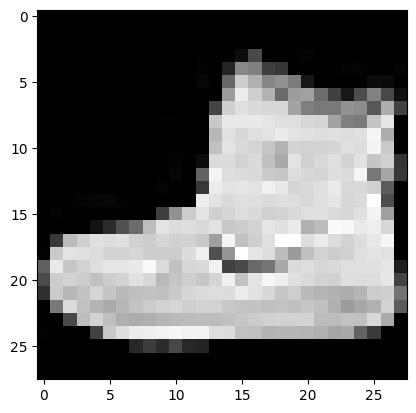

In [42]:
plt.imshow(X_train[0], cmap=plt.cm.get_cmap('gray'));

Escala los conjuntos de train y test para que vayan del 0 al 1. No hace falta usar ninguna librería. Con realizar una división en cada conjunto será suficiente.

In [43]:
# Antes de la normalización
print("Rango de valores antes de la normalización:")
print(f"Train: Min = {X_train.min()}, Max = {X_train.max()}")
print(f"Test: Min = {X_test.min()}, Max = {X_test.max()}")

Rango de valores antes de la normalización:
Train: Min = 0, Max = 255
Test: Min = 0, Max = 255


In [44]:
# Normalizar los valores de píxeles
X_train = X_train / 255.0
X_test = X_test / 255.0

# Verificar las dimensiones
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (60000, 28, 28), Test shape: (10000, 28, 28)


In [45]:
np.max(X_train)

np.float64(1.0)

In [46]:
'''
Comprobamos la normalización
'''
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [47]:
X_val = X_train[-10000:]
y_val = y_train[-10000:]

X_train = X_train[:-10000]
y_train = y_train[:-10000]

In [48]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


In [49]:
'''
# Escalar los conjuntos de entrenamiento y prueba para que estén en el rango [0, 1]
def scale_data(data):
    return data / 255.0

# Escalar los datos
X_train_scaled = scale_data(X_train)
X_test_scaled = scale_data(X_test)

# Verificar el rango
print(f"Rango de X_train_scaled: {X_train_scaled.min()} a {X_train_scaled.max()}")
print(f"Rango de X_test_scaled: {X_test_scaled.min()} a {X_test_scaled.max()}")
'''

'\n# Escalar los conjuntos de entrenamiento y prueba para que estén en el rango [0, 1]\ndef scale_data(data):\n    return data / 255.0\n\n# Escalar los datos\nX_train_scaled = scale_data(X_train)\nX_test_scaled = scale_data(X_test)\n\n# Verificar el rango\nprint(f"Rango de X_train_scaled: {X_train_scaled.min()} a {X_train_scaled.max()}")\nprint(f"Rango de X_test_scaled: {X_test_scaled.min()} a {X_test_scaled.max()}")\n'

## Construir el Modelo

Construir la red neuronal requiere configurar las capas del modelo y luego compilar el modelo.

### Configurar las Capas
Construye todas las capas del modelo.

In [50]:
28*28

784

In [51]:
X_train.shape

(50000, 28, 28)

In [52]:
# Otra manera de declarar la red neuronal
capas = [
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(units = 300, activation='relu'),
    keras.layers.Dense(units = 100, activation='relu'),
    keras.layers.Dense(units = 10, activation='softmax')
]

model = keras.models.Sequential(capas)

c:\Users\mikel\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [53]:
print(model.layers[0])

<Flatten name=flatten, built=True>


In [54]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()

In [55]:
weights

array([[ 0.01148652,  0.05005553,  0.02040534, ...,  0.05977444,
         0.029957  ,  0.04712923],
       [-0.03526745,  0.03021854, -0.03875283, ...,  0.00306216,
        -0.01242395, -0.0539008 ],
       [ 0.05429016, -0.01197566, -0.01156686, ..., -0.04001431,
        -0.04780286, -0.00555007],
       ...,
       [-0.00948266,  0.05136797,  0.02904155, ..., -0.0174704 ,
        -0.03811414, -0.05272522],
       [ 0.06276548,  0.01025815, -0.04009541, ..., -0.02037764,
         0.04682145,  0.03078897],
       [-0.02863108, -0.03484312,  0.03029911, ...,  0.03513119,
        -0.03193708,  0.00439084]], dtype=float32)

In [56]:
len(weights)

784

In [57]:
len(weights[0])

300

In [58]:
weights.size

235200

In [59]:
len(biases)

300

### Compila el modelo

Antes de que el modelo este listo para entrenar , se necesitan algunas configuraciones más. Estas son agregadas durante el paso de compilacion del modelo:

* *Loss function* —Esto mide que tan exacto es el modelo durante el entrenamiento. Quiere minimizar esta función para dirigir el modelo en la dirección adecuada.
* *Optimizer* — Esto es cómo el modelo aprende basado en el set de datos que ve y la función de pérdida.
* *Metrics* — Se usan para monitorear los pasos de entrenamiento y de pruebas.


Como es un problema de clasificación multiclase, tendrás que usar `sparse_categorical_crossentropy` como función de coste. En cuanto a las métricas, usa simplemente `accuracy`.

In [60]:
model.compile(
    optimizer = keras.optimizers.SGD(),
    loss = keras.losses.SparseCategoricalCrossentropy(),
    metrics = [keras.metrics.SparseCategoricalAccuracy()]
)

In [61]:
# Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

## Entrenar el Modelo
Empieza entrenándolo con 10 epochs. Prueba con más

In [62]:
X_train.shape

(50000, 28, 28)

In [74]:
from tensorflow.keras import models, layers

# Definir el modelo
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),          # Aplanar las imágenes
    layers.Dense(128, activation='relu'),         # Capa oculta con 128 neuronas
    layers.Dense(10, activation='softmax')        # Capa de salida con 10 clases
])

# Compilar el modelo
model.compile(
    optimizer='adam',  # Optimizer mejorado
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Entrenar el modelo
history = model.fit(
    X_train, y_train,
    batch_size=128,
    epochs=10,  # Reducido para pruebas rápidas; ajustar según necesidades
    validation_split=0.1
)


c:\Users\mikel\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7289 - loss: 0.7906 - val_accuracy: 0.8464 - val_loss: 0.4474
Epoch 2/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8448 - loss: 0.4416 - val_accuracy: 0.8544 - val_loss: 0.4135
Epoch 3/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8625 - loss: 0.3907 - val_accuracy: 0.8644 - val_loss: 0.3891
Epoch 4/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8724 - loss: 0.3552 - val_accuracy: 0.8722 - val_loss: 0.3632
Epoch 5/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8792 - loss: 0.3406 - val_accuracy: 0.8714 - val_loss: 0.3596
Epoch 6/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8845 - loss: 0.3226 - val_accuracy: 0.8822 - val_loss: 0.3334
Epoch 7/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8881 - loss: 0.3081 - val_accuracy: 0.8856 - val_loss: 0.3314
Epoch 8/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8917 - loss: 0.2995 - val_accuracy: 0.

In [76]:
# print(history.params)
# print(history.epoch)
print(history.history)

{'accuracy': [0.7960444688796997, 0.8501333594322205, 0.8629555702209473, 0.8737555742263794, 0.8795999884605408, 0.8852888941764832, 0.8894000053405762, 0.8935333490371704, 0.8964889049530029, 0.9011555314064026], 'loss': [0.5882777571678162, 0.42691969871520996, 0.3867049515247345, 0.3552255928516388, 0.3355056345462799, 0.32038408517837524, 0.30701130628585815, 0.29416322708129883, 0.28628289699554443, 0.2716587483882904], 'val_accuracy': [0.8464000225067139, 0.8543999791145325, 0.8644000291824341, 0.8722000122070312, 0.871399998664856, 0.8822000026702881, 0.8855999708175659, 0.8862000107765198, 0.8841999769210815, 0.8858000040054321], 'val_loss': [0.447357177734375, 0.4134902358055115, 0.3891412317752838, 0.36324602365493774, 0.35958734154701233, 0.3333839774131775, 0.33139434456825256, 0.3304380476474762, 0.3241761326789856, 0.32561928033828735]}


## Evaluar Accuracy
Prueba el rendimiento del modelo con los datos de test

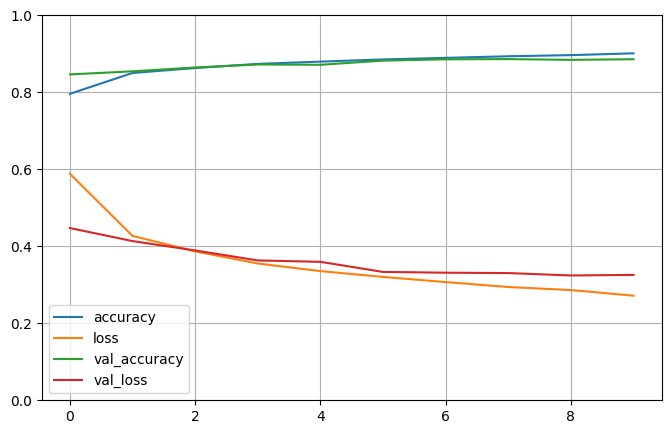

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

## Hacer predicciones

Con el modelo entrenado puedes usarlo para hacer predicciones sobre imagenes.

In [78]:
predictions = model.predict(X_test[:1])
print(predictions.shape)
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


(1, 10)


array([[1.2441805e-06, 1.9452531e-09, 2.3735424e-06, 1.1682578e-06,
        3.0764757e-06, 2.0035889e-02, 1.2409015e-04, 3.6877882e-02,
        2.3229793e-04, 9.4272196e-01]], dtype=float32)

In [79]:
predictions.argmax()

np.int64(9)

In [80]:
model.predict(X_test).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([9, 2, 1, ..., 8, 1, 5])

El modelo ha predecido la etiqueta para cada imagen en el set de datos de *test* (prueba).

*Una* prediccion es un array de 10 numeros. Estos representan el nivel de "confianza" del modelo sobre las imagenes de cada uno de los 10 articulos de moda/ropa. Puedes revisar cual tiene el nivel mas alto de confianza:

In [81]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, model.predict(X_test).argmax(axis=1))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[879,   0,  21,  29,   3,   0,  59,   0,   9,   0],
       [ 15, 943,   4,  31,   5,   0,   2,   0,   0,   0],
       [ 23,   0, 835,  16,  79,   0,  45,   0,   2,   0],
       [ 31,   2,  10, 906,  31,   0,  15,   0,   5,   0],
       [  0,   0, 134,  30, 786,   0,  49,   0,   1,   0],
       [  0,   0,   0,   1,   0, 934,   0,  36,   2,  27],
       [202,   1, 130,  30,  63,   0, 567,   0,   7,   0],
       [  0,   0,   0,   0,   0,  18,   0, 951,   0,  31],
       [  9,   0,  10,   6,   7,   3,   8,   3, 954,   0],
       [  0,   0,   0,   0,   0,   5,   1,  35,   0, 959]])

Entonces, el modelo tiene mayor confianza que esta imagen es un bota de tobillo "ankle boot" o `class_names[9]`. Examinando las etiquetas de *test* o de pruebas muestra que esta clasificación es correcta:

C:\Users\mikel\AppData\Local\Temp\ipykernel_1388\2156923697.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.imshow(X_test[0].reshape(28,28), cmap=plt.cm.get_cmap('Greys'));


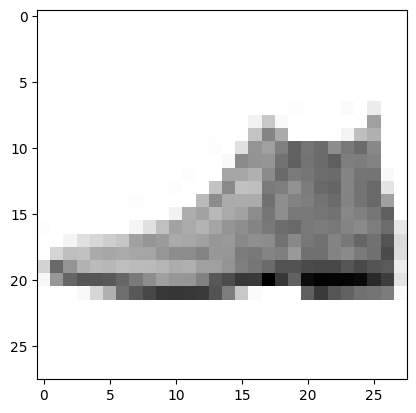

In [82]:
plt.imshow(X_test[0].reshape(28,28), cmap=plt.cm.get_cmap('Greys'));

Evalúa tu modelo con una matriz de confusión e interprétala.

In [83]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, model.predict(X_test).argmax(axis=1))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[879,   0,  21,  29,   3,   0,  59,   0,   9,   0],
       [ 15, 943,   4,  31,   5,   0,   2,   0,   0,   0],
       [ 23,   0, 835,  16,  79,   0,  45,   0,   2,   0],
       [ 31,   2,  10, 906,  31,   0,  15,   0,   5,   0],
       [  0,   0, 134,  30, 786,   0,  49,   0,   1,   0],
       [  0,   0,   0,   1,   0, 934,   0,  36,   2,  27],
       [202,   1, 130,  30,  63,   0, 567,   0,   7,   0],
       [  0,   0,   0,   0,   0,  18,   0, 951,   0,  31],
       [  9,   0,  10,   6,   7,   3,   8,   3, 954,   0],
       [  0,   0,   0,   0,   0,   5,   1,  35,   0, 959]])

### Interpretación de la Matriz de Confusión

#### Estructura
- **Filas**: Etiquetas reales (verdaderas).
- **Columnas**: Etiquetas predichas.
- **Diagonal principal**: Predicciones correctas.
- **Fuera de la diagonal**: Errores de clasificación.

#### Análisis
1. **Clase 0**:
   - Correctas: 823.
   - Errores: 50 como clase 3, 16 como clase 2, etc.
2. **Clase 1**:
   - Correctas: 952.
   - Errores: 30 como clase 3, 6 como clase 2, etc.
3. **Clase 6**:
   - Correctas: 545.
   - Errores: 156 como clase 0, 132 como clase 2, etc.

#### Evaluación
- **Buen desempeño general**: Mayoría de valores en la diagonal principal.
- **Errores significativos**: Confusiones entre clases 6 y 0, y 6 y 2.



Finalmente, usamos el modelo entrenado para hacer una prediccion sobre una única imagen.

In [84]:
# Seleccionar una imagen del conjunto de prueba
image_to_predict = X_test[0]  # Cambia el índice para probar otra imagen

# Añadir una dimensión para que el modelo acepte la entrada (debe ser [1, 28, 28])
image_to_predict = image_to_predict.reshape(1, 28, 28)

# Realizar la predicción
single_prediction = model.predict(image_to_predict)

# Obtener la etiqueta predicha
predicted_label = single_prediction.argmax()

print(f"Etiqueta predicha: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Etiqueta predicha: 9


In [85]:
print(f"Etiqueta real: {y_test[0]}")


Etiqueta real: 9
